# Predicting DSEX Stock Price Using Artificial Neural Network(ANN)

 
Md. Shakil Sikder (Shawon),
Department of Statistics,
Bangabandhu Sheikh Mujibur Rahman Science & Technology University 

# Importing Libaries

In [150]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

# Plot Function and Root MSE function

In [177]:
def plot_predictions(test,predicted):
    plt.figure(figsize = (20,10))
    plt.plot(test, color='red',label='Real DSEX Stock Price')
    plt.plot(predicted, color='blue',label='Predicted DSEX Stock Price')
    plt.title('DSEX Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('DSEX Stock Price')
    plt.legend()
    plt.show()

In [152]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Data read

In [153]:
dataset = pd.read_csv('DSEX.csv', index_col='Date', parse_dates=['Date'])
dataset.tail()

,Price,Open,High,Low,Unnamed: 5,Unnamed: 6
Date,,,,,,
2013-02-05,4191.50,4191.50,4191.50,4191.50,NaN,NaN
2013-02-04,4164.62,4164.62,4164.62,4164.62,NaN,NaN
2013-02-03,4163.82,4163.82,4163.82,4163.82,NaN,NaN
2013-01-31,4136.30,4136.30,4136.30,4136.30,NaN,NaN
2013-01-30,4126.75,4126.75,4126.75,4126.75,NaN,NaN


In [154]:
data=dataset.drop(columns=['Unnamed: 5', 'Unnamed: 6']) # Original Data


In [155]:
data.head()

,Price,Open,High,Low
Date,,,,
2018-04-30,5739.22,5739.22,5739.22,5739.22
2018-04-26,5813.79,5813.79,5813.79,5813.79
2018-04-25,5802.02,5802.02,5802.02,5802.02
2018-04-24,5777.35,5777.35,5777.35,5777.35
2018-04-23,5806.13,5806.13,5806.13,5806.13


Let’s briefly discuss this. Open is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day), high is the highest price of the stock on that trading day, low the lowest price of the stock on that trading day, and price the price of the stock at closing time

In [156]:
data.tail()

,Price,Open,High,Low
Date,,,,
2013-02-05,4191.50,4191.50,4191.50,4191.50
2013-02-04,4164.62,4164.62,4164.62,4164.62
2013-02-03,4163.82,4163.82,4163.82,4163.82
2013-01-31,4136.30,4136.30,4136.30,4136.30
2013-01-30,4126.75,4126.75,4126.75,4126.75


# Train and Testing Set

In [157]:
training_set = data['2016':].iloc[:,0:5]
test_set = data[:'2017'].iloc[:,0:1]

# Plotting

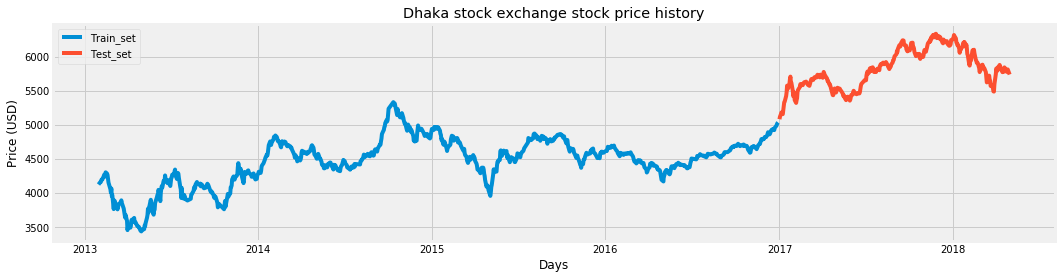

In [158]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))

plt.plot(training_set["Price"])
plt.plot(test_set["Price"])

plt.title('Dhaka stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Train_set','Test_set'], loc='upper left')
plt.show()

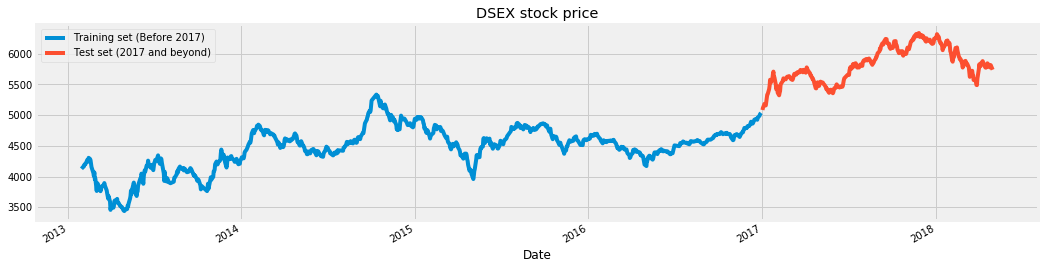

In [159]:
data["Price"]['2016':].plot(figsize=(16,4),legend=True)
data["Price"][:'2017'].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('DSEX stock price')
plt.show()

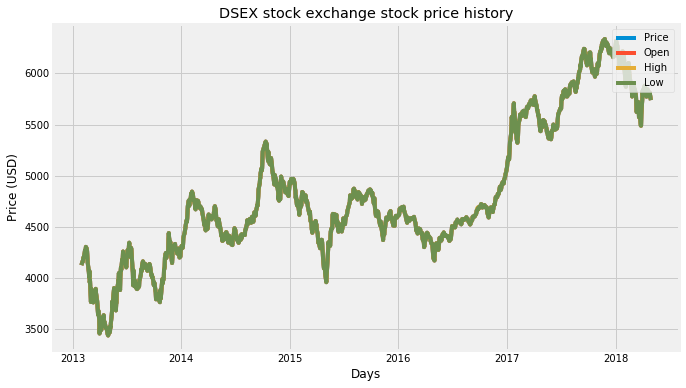

In [160]:
plt.figure(figsize = (10,6))
plt.plot(dataset["Price"])
plt.plot(dataset["Open"])
plt.plot(dataset["High"])
plt.plot(dataset["Low"])
plt.title('DSEX stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Price','Open','High','Low'], loc='upper right')
plt.show()

# Feature engineering

In [163]:
train= training_set.values.reshape(-1, 1)
test = test_set.values.reshape(-1, 1)

In [164]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

In [165]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]


# ANN

In [166]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
3751/3751 [==============================] - 12s 3ms/step - loss: 0.0066
Epoch 2/100
3751/3751 [==============================] - 10s 3ms/step - loss: 9.1318e-04
Epoch 3/100
3751/3751 [==============================] - 11s 3ms/step - loss: 8.7346e-04
Epoch 4/100
3751/3751 [==============================] - 10s 3ms/step - loss: 7.7621e-04
Epoch 5/100
3751/3751 [==============================] - 9s 2ms/step - loss: 6.8471e-04
Epoch 6/100
3751/3751 [==============================] - 10s 3ms/step - loss: 6.0280e-04
Epoch 7/100
3751/3751 [==============================] - 10s 3ms/step - loss: 5.5130e-04
Epoch 8/100
3751/3751 [==============================] - 15s 4ms/step - loss: 5.4295e-04
Epoch 9/100
3751/3751 [==============================] - 13s 4ms/step - loss: 5.3950e-04
Epoch 10/100
3751/3751 [==============================] - 10s 3ms/step - loss: 5.3826e-04
Epoch 11/100
3751/3751 [==============================] - 11s 3ms/step - loss: 5.3604e-04
Epoch 12/100
3751/3751 [

# R-squared for the model

In [167]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.944
The R2 score on the Test set is:	0.920


In [168]:
nn_y_pred_test = nn_model.predict(X_test)

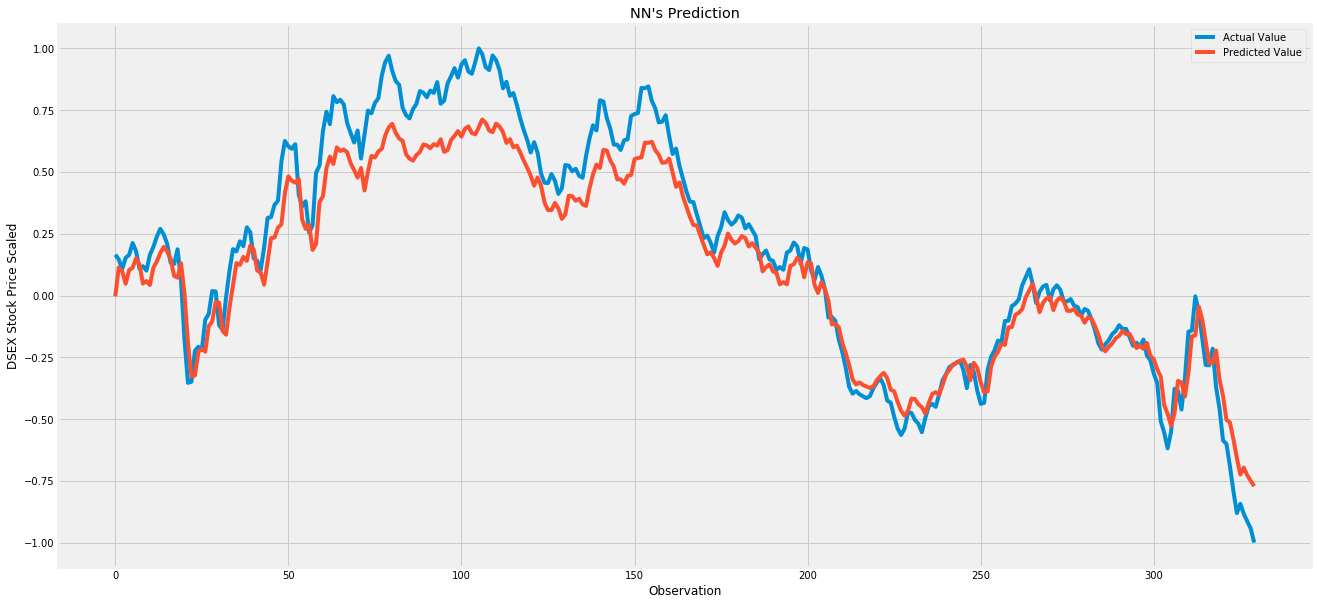

In [180]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Actual Value')
plt.plot(y_pred_test_nn, label='Predicted Value')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('DSEX Stock Price Scaled')
plt.legend()
plt.show();

# Root Mean Squred Error

In [170]:
return_rmse(y_test,y_pred_test_nn)

The root mean squared error is 0.13199490625822352.


# Transforming original values

In [172]:
predicted_stock_price = scaler.inverse_transform(nn_y_pred_test)

In [173]:
y_testp = scaler.inverse_transform(y_test)

In [174]:
return_rmse(y_testp,predicted_stock_price)

The root mean squared error is 82.69412839419746.


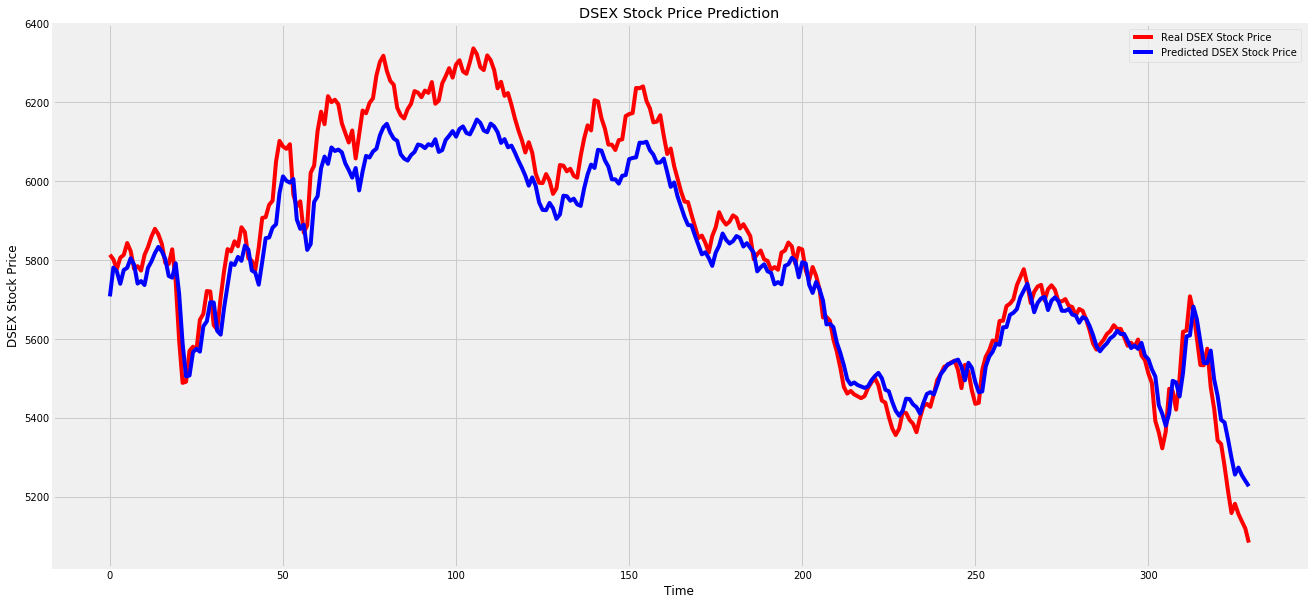

In [178]:
plot_predictions(y_testp,predicted_stock_price)